# Dimensionsreduzierung

In [53]:
%store -r columns_encoded
%store -r columns
%store -r data
%store -r data_encoded

columns_encoded = columns_encoded
columns = columns
data = data
data_encoded = data_encoded

In [54]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, KernelPCA
from sklearn.manifold import TSNE

## Feature Selection

- Die Freitextfelder (d. h. "Lieblingssportart", "Lieblingsessen" & "Lieblings-Musiker*in") werden für die Dimensionsreduzierung entfernt
- Begründungen
    - Durch die Umwandlung in numerische Werte per One-Hot-Encoding könnten diese theoretisch für Berechnung genutzt werden. Da fast alle Angaben aber nur einmal auftauchen, gibt es hier häufig starke Korrelationen
        - Bsp.: Eine Person hat als einzige eine bestimmte Lieblingssportart & Lieblingsessen angegeben, die dadurch vermeintlich stark miteinander korrelieren
    - Da immer nur eine Angabe pro "Lieblingssportart"/"Lieblingsessen"/"Lieblings-Musiker*in" möglich war, sind die Angaben bei allen anderen Features der Kategorie "0", wodurch der Informationsgehalt der Features sehr gering ist

- (Fast) Alle weiteren Features sind durch Fragestellung auf Werte von 1-5 beschränkt, wodurch keine weiteren Features offensichtlich irrelevant wären...

In [55]:
data_numerical = data.copy().select_dtypes(include='number')

### Skalieren der Daten

Da fast alle Fragen einen Zahlenraum von 1-5 vorgegeben hatten, müsste hierfür eigentlich keine Skalierung durchgeführt werden. Trotzdem skalieren wir die Daten, insb. aus den folgenden Gründen:

- Einzelne Features wie z. B. "Alter" machen eine Skalierung notwendig, da Clustering-Algorithmen sonst verschiedene Zahlenräume vergleichen würde
- Wenn in Zukunft weitere/andere Features (z. B. mit Zahlenraum von 1-10) eingeführt werden, sind die dargestellten Ansätze trotzdem langfristig nutzbar

In [96]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_numerical)

data_scaled.shape

(62, 56)

## Standard PCA

In [94]:
# Angabe der gewünschten Dimensionen
pca = PCA(n_components=3)
X_pca = pca.fit_transform(data_scaled)
X_pca.shape

(62, 3)

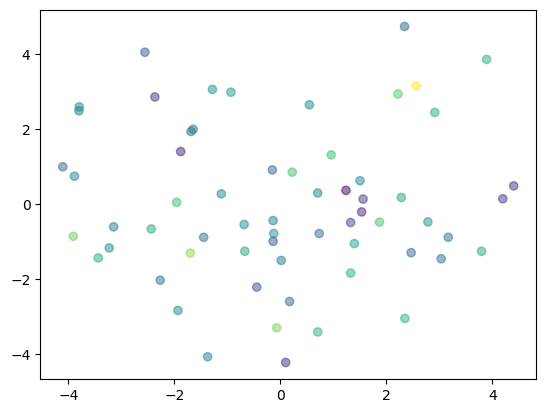

In [58]:
plt.scatter(X_pca[:,0], X_pca[:,1], c=X_pca[:,2], alpha=0.5)

## Kernel-PCA

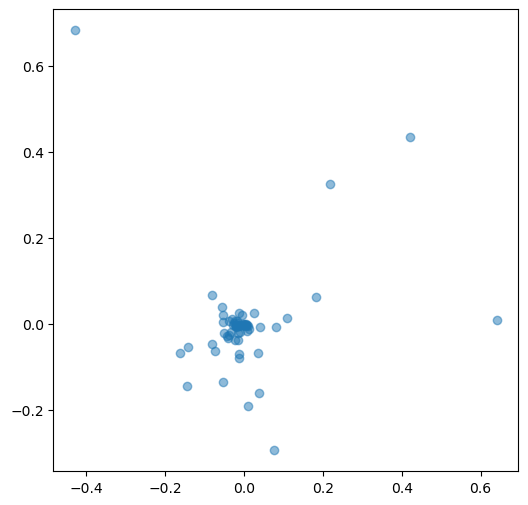

In [59]:
# Angabe der gewünschten Dimensionen
kpca = KernelPCA(n_components=2, kernel="rbf", gamma=10)
X_kpca = kpca.fit_transform(data_scaled)
X_kpca

fix, ax = plt.subplots(figsize=(6,6))
# ax.scatter(X_kpca[:,0], X_kpca[:,1], alpha=0.5, c=X_kpca.labels)
ax.scatter(X_kpca[:,0], X_kpca[:,1], alpha=0.5)

## t-SNE

In [60]:
tsne = TSNE(perplexity=50, random_state=0)
X_tnse = tsne.fit_transform(data_scaled)
X_tnse.T

array([[-0.69405687, -0.79765165, -1.5896147 ,  0.03760719, -0.15373576,
        -0.18905172, -1.115397  , -0.80233693, -0.60014987, -0.59602654,
        -0.5328714 ,  0.22217715, -1.406957  , -0.08245122,  0.11553487,
        -0.1406774 , -0.94014287, -0.89052296, -1.3239375 , -0.14236447,
        -0.4872988 , -0.7400696 , -0.3275008 , -0.6250821 ,  0.10629334,
        -0.5960993 , -0.8816482 , -0.80599105, -0.63249993, -1.2128514 ,
        -0.7198583 , -0.40418047, -0.1850997 , -0.28384852,  0.03212174,
        -1.0962695 , -0.4699017 , -1.0640811 , -1.3686651 ,  0.06148239,
        -0.18061978, -1.7566881 , -0.81346303, -1.3394248 , -1.011135  ,
        -0.7408037 ,  0.08775586, -0.06127157, -0.59648126, -0.41086632,
        -0.75294405, -1.0213131 , -0.7041282 , -0.19685699, -0.34079424,
        -1.0988255 ,  0.24708934, -1.4493064 , -0.7308706 , -0.69117725,
        -0.95182973,  0.4458639 ],
       [ 1.1682488 ,  1.3321284 ,  1.2729965 ,  1.5755262 ,  0.89934576,
         1.32401

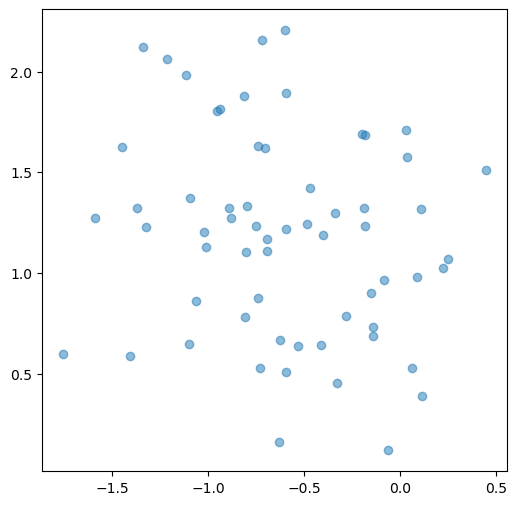

In [61]:
fix, ax = plt.subplots(figsize=(6,6))
ax.scatter(X_tnse[:,0], X_tnse[:,1], alpha=0.5)

## Dimensionsreduzierung nach Kategorien

Durch Entfernen nicht-numerischer Features entfernte Spalten...

In [70]:
data_numerical.columns
set(data.columns) - set(data_numerical.columns)

{'Bitte gib hier ein Pseudonym ein und merke dir dieses\n(z.B. Kürzel, Zahlencode, etc.). Damit können nach Abschluss des Projektes der eigene "Datenpunkt" gefunden werden. Das Pseudonym wird für Andere sichtbar sein.',
 'Geschlecht',
 'Was ist dein Lieblingsessen? (nur eines angeben)',
 'Was ist deine Lieblingsband bzw. dein/e Lieblings-Musiker*in?\n(nur eine/n angeben)',
 'Was ist deine absolute Lieblingssportart?',
 'Welchem Studiengang fühlst du dich am meisten zugehörig?',
 'Welcher Funktion an der HSD fühlst du dich am meisten\nzugehörig?'}

In [83]:
short_labels = ["alter", "geschlecht", "pseudonym", "funktion", "studiengang", "sportlichkeit", "lieblingssportart",
          "ernaehrung", "essengehen", "kochen", "feiern", "lieblingsessen", "musik", "lieblingsmusiker", "lesen", "schauspiel",
          "filme", "malen", "museumsbesuche", "videospiele", "social_media", "technologie", "astronomie", "naturwissenschaften",
          "freiwilligenarbeit", "soziales", "introvertiert", "fomo", "spontan", "verwirrt", "gluecklich", "geduldig", "streitlustig",
          "abenteuerlustig", "studienzweifel", "studium_zufriedenheit", "akademische_laufbahn", "lerngruppe", "prokrastinieren",
          "letzter_druecker", "neue_lebensmittel", "natur", "reisen", "handwerk", "sprachnachrichten", "geld",]

'Welchem Studiengang fühlst du dich am meisten zugehörig?'

In [89]:
# Ursprüngliche Kategorien
# cat_demography = ["alter", "geschlecht", "pseudonym", "funktion", "studiengang"]

# Nach entfernen nicht-numerischer Werte
cat_demography = ("Demographie", ["alter"])

cat_sport = ("Sport", ["sportlichkeit", "ernaehrung", "essengehen", "kochen", "feiern",
 "sportarten_Basketball",
 "sportarten_Bouldern/Klettern",
 "sportarten_Football",
 "sportarten_Fußball",
 "sportarten_Handball",
 "sportarten_Hockey",
 "sportarten_Kampfsport",
 "sportarten_Leichtathletik",
 "sportarten_Reiten",
 "sportarten_Rennrad/Mountainbike",
 "sportarten_Schwimmen",
 "sportarten_Tanzen",
 "sportarten_Tennis",
 "sportarten_Volleyball",
 "sportarten_Wassersport",
 "sportarten_Wintersport",
 "sportarten_Yoga"])

cat_creativity = ("Kreativität", ["musik", "lesen", "schauspiel", "filme", "malen", "museumsbesuche"])

cat_science =       ("Wissenschaft", ["videospiele", "social_media", "technologie", "astronomie", "naturwissenschaften"])
cat_social =        ("Sozialer Umgang", ["freiwilligenarbeit", "soziales", "introvertiert", "fomo", "spontan", "verwirrt", "gluecklich", "geduldig", "streitlustig", "abenteuerlustig"])
cat_study =         ("Studienverhalten", [ "studienzweifel", "studium_zufriedenheit", "akademische_laufbahn", "lerngruppe", "prokrastinieren", "letzter_druecker"])
cat_personality =   ("Persönlichkeit", ["neue_lebensmittel", "natur", "reisen", "handwerk", "sprachnachrichten", "geld"])

all_categories = [cat_demography, cat_sport, cat_creativity, cat_science, cat_social, cat_study, cat_personality]
all_categories


[('Demographie', ['alter']),
 ('Sport',
  ['sportlichkeit',
   'ernaehrung',
   'essengehen',
   'kochen',
   'feiern',
   'sportarten_Basketball',
   'sportarten_Bouldern/Klettern',
   'sportarten_Football',
   'sportarten_Fußball',
   'sportarten_Handball',
   'sportarten_Hockey',
   'sportarten_Kampfsport',
   'sportarten_Leichtathletik',
   'sportarten_Reiten',
   'sportarten_Rennrad/Mountainbike',
   'sportarten_Schwimmen',
   'sportarten_Tanzen',
   'sportarten_Tennis',
   'sportarten_Volleyball',
   'sportarten_Wassersport',
   'sportarten_Wintersport',
   'sportarten_Yoga']),
 ('Kreativität',
  ['musik', 'lesen', 'schauspiel', 'filme', 'malen', 'museumsbesuche']),
 ('Wissenschaft',
  ['videospiele',
   'social_media',
   'technologie',
   'astronomie',
   'naturwissenschaften']),
 ('Sozialer Umgang',
  ['freiwilligenarbeit',
   'soziales',
   'introvertiert',
   'fomo',
   'spontan',
   'verwirrt',
   'gluecklich',
   'geduldig',
   'streitlustig',
   'abenteuerlustig']),
 ('St

In [92]:
data_reduced = pd.DataFrame(columns=[category[0] for category in all_categories])
data_reduced

,Demographie,Sport,Kreativität,Wissenschaft,Sozialer Umgang,Studienverhalten,Persönlichkeit


In [112]:
pca = PCA(n_components=1)

for category in all_categories:
    X_pca = pca.fit_transform(data_numerical[[columns[x] for x in category[1]]])
    data_reduced[category[0]] = X_pca[:,0]

data_reduced

,Demographie,Sport,Kreativität,Wissenschaft,Sozialer Umgang,Studienverhalten,Persönlichkeit
0,2.467742,0.595164,-0.102372,-1.949752,-0.043447,1.864567,0.206211
1,0.467742,0.294061,-0.985195,1.692514,-0.155122,1.521095,0.310153
2,-1.532258,-0.637298,-1.717151,-0.729137,-2.443271,1.217079,1.531966
3,-2.532258,1.043901,1.734373,0.013067,0.810734,0.892807,-0.232712
4,-1.532258,2.111784,1.114197,-3.170366,1.411568,-2.482959,0.345181
...,...,...,...,...,...,...,...
57,0.467742,-0.363452,-3.301778,-2.355689,1.502015,3.271069,-1.098116
58,-3.532258,-0.424452,3.812994,-1.536991,-1.325976,0.539090,-1.306531
59,-0.532258,0.652830,-1.249742,-1.823500,0.661401,-1.315982,-1.656247
60,5.467742,-1.007883,-3.552167,2.028667,-0.440937,1.848237,-1.267178


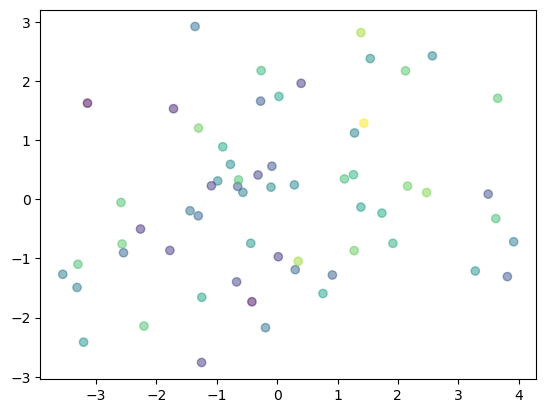

In [114]:
plt.scatter(data_reduced["Kreativität"], data_reduced["Persönlichkeit"], c=data_reduced["Sozialer Umgang"], alpha=0.5)